# Day5 Practice Assignments:

1.Create a CNN model for binary class problems.
2.Build a multiclass classification model using CNN
Note: You can download any Dataset to build the above model


In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X, y), (_, _) = mnist.load_data()

# Define a binary classification task: even or odd
y_binary = np.where(y % 2 == 0, 0, 1)

# Reshape and normalize the input data
X = X.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the binary labels
y_binary = to_categorical(y_binary, num_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
result=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/5
600/600 [==============================] - 17s 27ms/step - loss: 0.1089 - accuracy: 0.9591 - val_loss: 0.0486 - val_accuracy: 0.9832
Epoch 2/5
600/600 [==============================] - 16s 26ms/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.0348 - val_accuracy: 0.9871
Epoch 3/5
600/600 [==============================] - 16s 26ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0322 - val_accuracy: 0.9887
Epoch 4/5
600/600 [==============================] - 16s 26ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0281 - val_accuracy: 0.9901
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0334 - accuracy: 0.9888
Test Loss: 0.0334
Test Accuracy: 0.9888


In [23]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


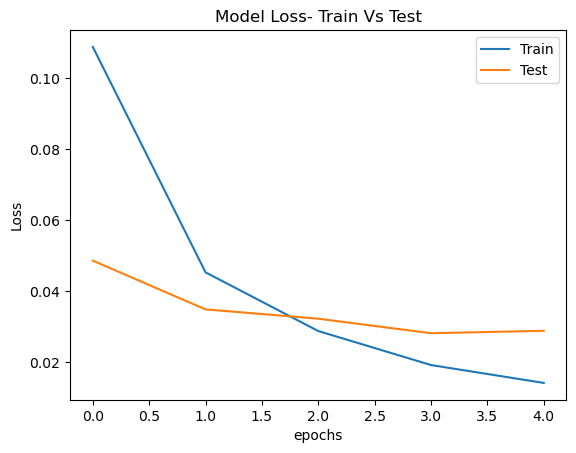

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

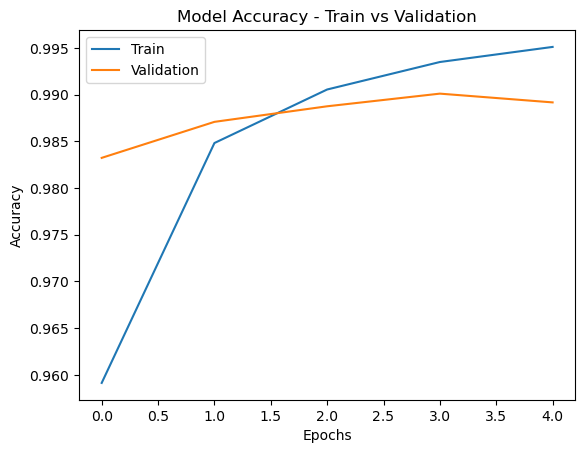

In [27]:
# Plot training & validation accuracy values
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy - Train vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()